<a href="https://colab.research.google.com/github/ffer200395/ML-course/blob/main/2_Regresi%C3%B3n_Financial_product_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For data handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics 
from sklearn.metrics import mean_absolute_error

In [2]:
# Read price data
df = pd.read_csv('/content/BAC_price.csv', index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-02-21 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,99200,0.0,0.0
1973-02-22 00:00:00-05:00,1.646142,1.646142,1.646142,1.646142,47200,0.0,0.0
1973-02-23 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,133600,0.0,0.0
1973-02-26 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,24000,0.0,0.0
1973-02-27 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,41600,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-11 00:00:00-05:00,38.189999,38.599998,37.970001,38.410000,35676800,0.0,0.0
2022-11-14 00:00:00-05:00,38.090000,38.259998,37.750000,37.759998,35541400,0.0,0.0
2022-11-15 00:00:00-05:00,38.189999,38.299999,37.299999,37.700001,46082800,0.0,0.0


In [3]:
# Calculate mean price
df['Mean'] = df[['High','Low']].mean(axis=1)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean
Date,,,,,,,,
1973-02-21 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,99200,0.0,0.0,1.640601
1973-02-22 00:00:00-05:00,1.646142,1.646142,1.646142,1.646142,47200,0.0,0.0,1.646142
1973-02-23 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,133600,0.0,0.0,1.640601
1973-02-26 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,24000,0.0,0.0,1.640601
1973-02-27 00:00:00-05:00,1.640601,1.640601,1.640601,1.640601,41600,0.0,0.0,1.640601
...,...,...,...,...,...,...,...,...
2022-11-11 00:00:00-05:00,38.189999,38.599998,37.970001,38.410000,35676800,0.0,0.0,38.285000
2022-11-14 00:00:00-05:00,38.090000,38.259998,37.750000,37.759998,35541400,0.0,0.0,38.004999
2022-11-15 00:00:00-05:00,38.189999,38.299999,37.299999,37.700001,46082800,0.0,0.0,37.799999


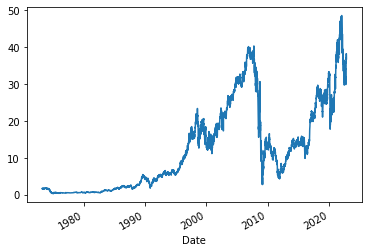

In [4]:
# Plot the price
df['Mean'].plot()

In [5]:
# Time series that will be used to create a dataset of prices
prices = df['Mean'].values
prices

array([ 1.64060116,  1.64614213,  1.64060116, ..., 37.79999924,
       37.47000122, 36.85855103])

In [6]:
# Split the dataset into segments of length 4
n = 4
X = np.array([prices[i:i+n] for i in range(len(prices)) if len(prices[i:i+n])==n])
X, y = X[:,:3], X[:,-1]

In [7]:
print(X,y)

[[ 1.64060116  1.64614213  1.64060116]
 [ 1.64614213  1.64060116  1.64060116]
 [ 1.64060116  1.64060116  1.64060116]
 ...
 [37.68000031 38.28499985 38.00499916]
 [38.28499985 38.00499916 37.79999924]
 [38.00499916 37.79999924 37.47000122]] [ 1.64060116  1.64060116  1.64060116 ... 37.79999924 37.47000122
 36.85855103]


In [8]:
# 80% of the data set for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the data
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [12]:
pipe[1].coef_

array([ 0.5311447 , -2.74740825, 13.93719033])

In [13]:
yhat = pipe.predict(X_test)

In [14]:
yhat

array([ 1.95719143,  0.63074514,  0.5995975 , ..., 14.71789616,
        5.74354668, 30.12950094])

In [15]:
mean_absolute_error(y_test, yhat)

0.1403390743880365